<a href="https://colab.research.google.com/github/rnjsdn12332/GAN_study/blob/main/0628_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas, numpy, random
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('./mount') #파일 접근을 위해 드라이브 마운트

Mounted at ./mount


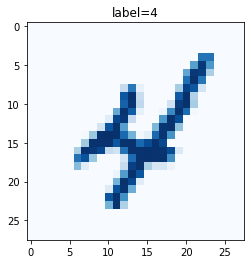

In [4]:

class MnistDataset(Dataset) :

    def __init__(self, csv_file) :
        self.data_df=pandas.read_csv(csv_file, header=None)
        pass
    
    #데이터셋의 길이 반환
    def __len__(self) : 
        return len(self.data_df)

    #데이터셋의 n번째 아이템 반환
    def __getitem__(self, index) : 
        #이미지 목표(레이블)
        label=self.data_df.iloc[index, 0]
        target=torch.zeros((10))
        target[label]=1.0 #원핫인코딩

        #이미지 픽셀값을 담은 것을 0과 1사이 범위로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        return label, image_values, target
    
    def plot_image(self, index) :
        img=self.data_df.iloc[index, 1:].values.reshape(28,28)
        plt.title("label="+str(self.data_df.iloc[index, 0]))
        plt.imshow(img, interpolation = "none", cmap="Blues")
        

mnist_dataset=MnistDataset('mount/My Drive/Colab Notebooks/myo_gan/mnist_data/mnist_train.csv')
mnist_dataset.plot_image(9)